# Weather Prediction Using LSTM Network


In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.layers import LSTM,Activation,Dropout
from sklearn.metrics import mean_squared_error
import math

In [2]:
df=pd.read_csv('kolkata_2007-2022.csv')
# train_datetime=pd.to_datetime(df['Date Time']).dt.strftime('%d-%m-%Y)
# train_datetime = pd.to_datetime(df['Date Time'], format='%d-%m-%Y %H:%M').dt.strftime('%m-%d-%Y %H:%M')

# train_datetime
df['Year'] = pd.DatetimeIndex(df['Date Time']).year
df['Month'] = pd.DatetimeIndex(df['Date Time']).month
df['Day'] = pd.DatetimeIndex(df['Date Time']).day
df['Time'] = pd.DatetimeIndex(df['Date Time']).hour

In [3]:
df

,Date Time,2-dewTemp(k),Precipitation(m),Surface Pressure(Pa),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec),Year,Month,Day,Time
0,01-01-2007 00:00,284.308554,0.0,0,0.0,285.769117,-0.000004,1.340944,0.213013,0.639707,1.258620,2007,1,1,0
1,01-01-2007 01:00,284.003139,0.0,0,0.0,284.965034,-0.000005,0.974300,1.344026,-0.200441,1.793706,2007,1,1,1
2,01-01-2007 02:00,284.205460,0.0,0,0.0,287.165814,-0.000021,0.815108,1.958998,-0.158952,1.511432,2007,1,1,2
3,01-01-2007 03:00,284.893180,0.0,0,0.0,292.670003,-0.000081,0.774050,1.550442,0.276104,0.867998,2007,1,1,3
4,01-01-2007 04:00,283.746264,0.0,0,0.0,293.361634,-0.000163,1.423781,1.064937,1.088016,0.831407,2007,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,31-12-2022 19:00,289.768091,0.0,0,0.0,291.188584,-0.000004,1.219038,-3.196883,-0.142054,-1.699353,2022,12,31,19
140252,31-12-2022 20:00,289.469715,0.0,0,0.0,290.636282,-0.000005,1.029796,-3.420987,-0.261826,-1.647511,2022,12,31,20
140253,31-12-2022 21:00,289.520129,0.0,0,0.0,290.887008,-0.000004,0.737331,-3.421921,-0.420285,-1.565637,2022,12,31,21
140254,31-12-2022 22:00,289.573531,0.0,0,0.0,290.194742,-0.000005,1.210117,-3.048880,-0.301043,-1.522375,2022,12,31,22


In [4]:
# shift column 'Name' to first position
first_column = df.pop('Time')  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Time', first_column)

# shift column 'Name' to first position
first_column = df.pop('Day')
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Day', first_column)


# shift column 'Name' to first position
first_column = df.pop('Month')  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Month', first_column)


# shift column 'Name' to first position
first_column = df.pop('Year')  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Year', first_column)


df=df.drop(['Date Time'], axis=1)
# df=df.drop(['Precipitation(m)'], axis=1)
# df=df.drop(['Rainfall Rate(kgm-2sec-1)'], axis=1)
# df=df.drop(['100-u-wind(m/sec)'], axis=1)
# df=df.drop(['10-u-wind(m/sec)'], axis=1)
df

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Surface Pressure(Pa),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec)
0,2007,1,1,0,284.308554,0.0,0,0.0,285.769117,-0.000004,1.340944,0.213013,0.639707,1.258620
1,2007,1,1,1,284.003139,0.0,0,0.0,284.965034,-0.000005,0.974300,1.344026,-0.200441,1.793706
2,2007,1,1,2,284.205460,0.0,0,0.0,287.165814,-0.000021,0.815108,1.958998,-0.158952,1.511432
3,2007,1,1,3,284.893180,0.0,0,0.0,292.670003,-0.000081,0.774050,1.550442,0.276104,0.867998
4,2007,1,1,4,283.746264,0.0,0,0.0,293.361634,-0.000163,1.423781,1.064937,1.088016,0.831407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2022,12,31,19,289.768091,0.0,0,0.0,291.188584,-0.000004,1.219038,-3.196883,-0.142054,-1.699353
140252,2022,12,31,20,289.469715,0.0,0,0.0,290.636282,-0.000005,1.029796,-3.420987,-0.261826,-1.647511
140253,2022,12,31,21,289.520129,0.0,0,0.0,290.887008,-0.000004,0.737331,-3.421921,-0.420285,-1.565637
140254,2022,12,31,22,289.573531,0.0,0,0.0,290.194742,-0.000005,1.210117,-3.048880,-0.301043,-1.522375


In [5]:
index_no = df.columns.get_loc('Temperature(k)')
index_no

8

In [6]:
df["Evaporation"]=(-1)*df["Evaporation"]
df


,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Surface Pressure(Pa),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec)
0,2007,1,1,0,284.308554,0.0,0,0.0,285.769117,0.000004,1.340944,0.213013,0.639707,1.258620
1,2007,1,1,1,284.003139,0.0,0,0.0,284.965034,0.000005,0.974300,1.344026,-0.200441,1.793706
2,2007,1,1,2,284.205460,0.0,0,0.0,287.165814,0.000021,0.815108,1.958998,-0.158952,1.511432
3,2007,1,1,3,284.893180,0.0,0,0.0,292.670003,0.000081,0.774050,1.550442,0.276104,0.867998
4,2007,1,1,4,283.746264,0.0,0,0.0,293.361634,0.000163,1.423781,1.064937,1.088016,0.831407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2022,12,31,19,289.768091,0.0,0,0.0,291.188584,0.000004,1.219038,-3.196883,-0.142054,-1.699353
140252,2022,12,31,20,289.469715,0.0,0,0.0,290.636282,0.000005,1.029796,-3.420987,-0.261826,-1.647511
140253,2022,12,31,21,289.520129,0.0,0,0.0,290.887008,0.000004,0.737331,-3.421921,-0.420285,-1.565637
140254,2022,12,31,22,289.573531,0.0,0,0.0,290.194742,0.000005,1.210117,-3.048880,-0.301043,-1.522375


In [7]:
df1=df.copy()
df1=df1.drop(['Year'], axis=1)
df1=df1.drop(['Month'], axis=1)
df1=df1.drop(['Day'], axis=1)
df1=df1.drop(['Time'], axis=1)
df1=df1.drop(['Temperature(k)'], axis=1)
df1=df1.drop(['Surface Pressure(Pa)'], axis=1)
df1

,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec)
0,284.308554,0.0,0.0,0.000004,1.340944,0.213013,0.639707,1.258620
1,284.003139,0.0,0.0,0.000005,0.974300,1.344026,-0.200441,1.793706
2,284.205460,0.0,0.0,0.000021,0.815108,1.958998,-0.158952,1.511432
3,284.893180,0.0,0.0,0.000081,0.774050,1.550442,0.276104,0.867998
4,283.746264,0.0,0.0,0.000163,1.423781,1.064937,1.088016,0.831407
...,...,...,...,...,...,...,...,...
140251,289.768091,0.0,0.0,0.000004,1.219038,-3.196883,-0.142054,-1.699353
140252,289.469715,0.0,0.0,0.000005,1.029796,-3.420987,-0.261826,-1.647511
140253,289.520129,0.0,0.0,0.000004,0.737331,-3.421921,-0.420285,-1.565637
140254,289.573531,0.0,0.0,0.000005,1.210117,-3.048880,-0.301043,-1.522375


In [8]:
df1.corr()

,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec)
2-dewTemp(k),1.000000,0.175365,0.080666,0.081819,0.677518,-0.068822,0.669588,-0.144918
Precipitation(m),0.175365,1.000000,0.636844,0.087966,0.071051,-0.056000,0.079207,-0.069545
Rainfall Rate(kgm-2sec-1),0.080666,0.636844,1.000000,-0.005544,0.014769,-0.022610,0.015316,-0.027501
Evaporation,0.081819,0.087966,-0.005544,1.000000,0.023799,-0.011218,0.076539,0.016625
100-v-wind(m/sec),0.677518,0.071051,0.014769,0.023799,1.000000,0.121404,0.977251,0.027847
100-u-wind(m/sec),-0.068822,-0.056000,-0.022610,-0.011218,0.121404,1.000000,0.134091,0.969924
10-v-wind(m/sec),0.669588,0.079207,0.015316,0.076539,0.977251,0.134091,1.000000,0.053638
10-u-wind(m/sec),-0.144918,-0.069545,-0.027501,0.016625,0.027847,0.969924,0.053638,1.000000


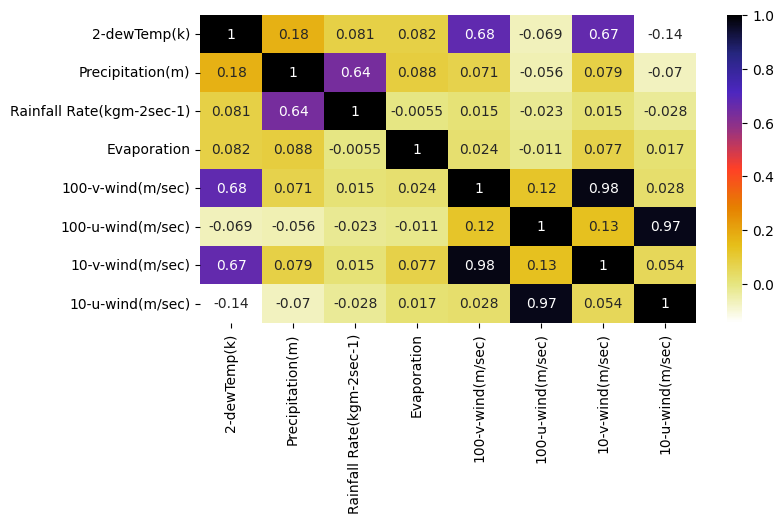

In [9]:
plt.figure(figsize=(8,4))
cor=df1.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
df=df.drop(['Surface Pressure(Pa)'], axis=1)
df=df.drop(['100-u-wind(m/sec)'], axis=1)
df=df.drop(['100-v-wind(m/sec)'], axis=1)
df

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
0,2007,1,1,0,284.308554,0.0,0.0,285.769117,0.000004,0.639707,1.258620
1,2007,1,1,1,284.003139,0.0,0.0,284.965034,0.000005,-0.200441,1.793706
2,2007,1,1,2,284.205460,0.0,0.0,287.165814,0.000021,-0.158952,1.511432
3,2007,1,1,3,284.893180,0.0,0.0,292.670003,0.000081,0.276104,0.867998
4,2007,1,1,4,283.746264,0.0,0.0,293.361634,0.000163,1.088016,0.831407
...,...,...,...,...,...,...,...,...,...,...,...
140251,2022,12,31,19,289.768091,0.0,0.0,291.188584,0.000004,-0.142054,-1.699353
140252,2022,12,31,20,289.469715,0.0,0.0,290.636282,0.000005,-0.261826,-1.647511
140253,2022,12,31,21,289.520129,0.0,0.0,290.887008,0.000004,-0.420285,-1.565637
140254,2022,12,31,22,289.573531,0.0,0.0,290.194742,0.000005,-0.301043,-1.522375


In [11]:
trainData=df[df['Year']<2020].copy()
trainData.tail()

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
113947,2019,12,31,19,285.733652,0.0,0.0,287.665036,0.000003,-0.756531,1.675570
113948,2019,12,31,20,284.736718,0.0,0.0,286.655047,0.000005,-1.145884,1.519295
113949,2019,12,31,21,284.582152,0.0,0.0,286.425160,0.000004,-1.524350,1.050471
113950,2019,12,31,22,283.781859,0.0,0.0,285.274712,0.000003,-1.599915,0.815154
113951,2019,12,31,23,283.505056,0.0,0.0,284.828074,0.000002,-1.635776,0.788002


<Axes: >

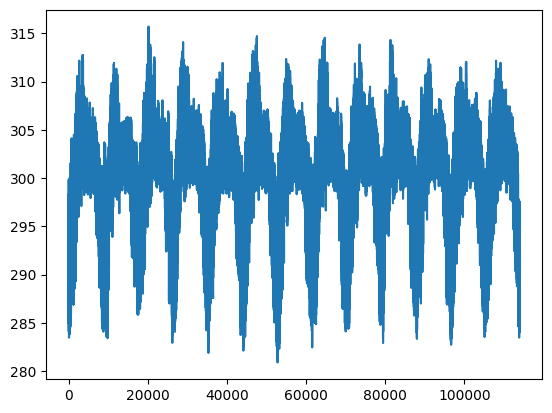

In [12]:
trainData['Temperature(k)'].plot()


In [13]:
testData=df[df['Year']>=2020].copy()
testData.head()

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
113952,2020,1,1,0,283.801373,0.0,8.670000e-19,285.735193,0.000003,-1.755947,1.101072
113953,2020,1,1,1,283.684834,0.0,8.670000e-19,285.423877,0.000002,-1.431264,1.059871
113954,2020,1,1,2,285.282351,0.0,8.670000e-19,288.672964,0.000019,-1.321512,1.143035
113955,2020,1,1,3,285.676940,0.0,8.670000e-19,289.247590,0.000088,-1.320750,0.958397
113956,2020,1,1,4,286.366786,0.0,8.670000e-19,289.891609,0.000175,-1.438886,0.893545


<Axes: >

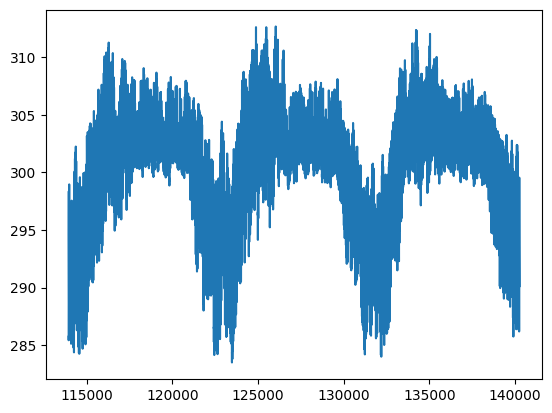

In [14]:
testData['Temperature(k)'].plot()

In [15]:
scaler=MinMaxScaler()
scaler=scaler.fit(trainData)
df_for_training_scaled=scaler.transform(trainData)
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.03913601, 0.54627705,
        0.5897769 ],
       [0.        , 0.        , 0.        , ..., 0.03951379, 0.50029531,
        0.61395921],
       [0.        , 0.        , 0.        , ..., 0.05843838, 0.50256602,
        0.60120229],
       ...,
       [1.        , 1.        , 1.        , ..., 0.03914781, 0.42783705,
        0.58036994],
       [1.        , 1.        , 1.        , ..., 0.03695195, 0.42370133,
        0.56973518],
       [1.        , 1.        , 1.        , ..., 0.0364325 , 0.42173861,
        0.56850809]])

In [16]:
trainX=[]
trainY=[]

In [17]:
n_future=1
n_past=15

In [18]:
for i in range(n_past, len(df_for_training_scaled)-n_future+1):
    trainX.append(df_for_training_scaled[i-n_past:i,0:trainData.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,7])

trainX, trainY=np.array(trainX), np.array(trainY)
print('trainX shape=={}.'.format(trainX.shape))
print('trainY shape=={}.'.format(trainY.shape))
  

trainX shape==(113937, 15, 11).
trainY shape==(113937, 1).


In [19]:

trainY

array([[0.20853932],
       [0.20988304],
       [0.18822634],
       ...,
       [0.15872858],
       [0.12567743],
       [0.11284597]])

In [20]:
trainX

array([[[0.        , 0.        , 0.        , ..., 0.03913601,
         0.54627705, 0.5897769 ],
        [0.        , 0.        , 0.        , ..., 0.03951379,
         0.50029531, 0.61395921],
        [0.        , 0.        , 0.        , ..., 0.05843838,
         0.50256602, 0.60120229],
        ...,
        [0.        , 0.        , 0.        , ..., 0.05206329,
         0.40666035, 0.59914056],
        [0.        , 0.        , 0.        , ..., 0.04970214,
         0.38392178, 0.58303334],
        [0.        , 0.        , 0.        , ..., 0.04875768,
         0.36225549, 0.55075445]],

       [[0.        , 0.        , 0.        , ..., 0.03951379,
         0.50029531, 0.61395921],
        [0.        , 0.        , 0.        , ..., 0.05843838,
         0.50256602, 0.60120229],
        [0.        , 0.        , 0.        , ..., 0.12903668,
         0.52637686, 0.57212337],
        ...,
        [0.        , 0.        , 0.        , ..., 0.04970214,
         0.38392178, 0.58303334],
        [0. 

In [21]:
model = Sequential()
model.add(LSTM(30, input_shape=(trainX.shape[1], trainX.shape[2])))   
model.add(Dense(256,name='FC1'))  #256
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,name='out_layer'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

In [22]:
# Initializing a Sequential model object in Keras.
# A Sequential model is a linear stack of layers, where each layer follows the previous one in a sequential order.
# model=Sequential()

# Adding LSTM to our network.
# 64 specifies the number of memory cells (or units) in the LSTM layer. In this case, the layer has 64 units.
# activation='relu'specifies the activation function to use within each LSTM unit.
# input_shape=(trainX.shape[1],trainX.shape[2]) specifies the shape of the input to the layer. 
#  return_sequences=True indicates that the layer should return the full sequence of outputs.
# model.add(LSTM(50,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))

# model.add(Dropout(0.4))
# 32 specifies the number of LSTM units (or cells) in the layer. This is a hyperparameter that can be tuned to control the capacity of the model.
# model.add(LSTM(20,activation='relu',return_sequences=False))


# The Dropout layer is a regularization technique that randomly drops out a fraction of the input units during training time. This helps to prevent overfitting in the neural network.
# 0.2: This specifies the fraction of the input units to drop out during training time. In this case, 20% of the input units will be randomly set to zero during each training batch.
# model.add(Dropout(0.4))
# This line of code is used to add a Dense layer to a neural network model.
# The Dense layer is a fully connected layer in which each neuron is connected to every neuron in the previous layer.
# The purpose of this layer is to apply a linear transformation to the output of the previous layer and generate the final output of the model.
# trainY.shape[1] This specifies the number of neurons in the Dense layer. In this case, the number of neurons is equal to the number of output features in the training data trainY.
# model.add(Dense(trainY.shape[1]))

In [23]:
cp=ModelCheckpoint('model/',save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.0001),loss=MeanSquaredError(), metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                5040      
                                                                 
 FC1 (Dense)                 (None, 256)               7936      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                                 
Total params: 13,233
Trainable params: 13,233
Non-trainable params: 0
_________________________________________________________________


In [24]:
# validation_split=0.1 specifies the fraction of the training data to be used for validation. In this case, 10% of the training data will be used for validation.
# verbose=1 specifies the level of detail to be printed during training. 
# In this case, a progress bar will be printed for each epoch.
history = model.fit(trainX, trainY, epochs=30, batch_size=128, validation_split=0.1, verbose=2, shuffle=False)

Epoch 1/30
802/802 - 9s - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0032 - val_mse: 0.0032 - 9s/epoch - 12ms/step
Epoch 2/30
802/802 - 6s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0019 - val_mse: 0.0019 - 6s/epoch - 7ms/step
Epoch 3/30
802/802 - 6s - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0016 - val_mse: 0.0016 - 6s/epoch - 7ms/step
Epoch 4/30
802/802 - 6s - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0014 - val_mse: 0.0014 - 6s/epoch - 7ms/step
Epoch 5/30
802/802 - 7s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0015 - val_mse: 0.0015 - 7s/epoch - 9ms/step
Epoch 6/30
802/802 - 6s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0017 - val_mse: 0.0017 - 6s/epoch - 7ms/step
Epoch 7/30
802/802 - 6s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0016 - val_mse: 0.0016 - 6s/epoch - 7ms/step
Epoch 8/30
802/802 - 6s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0014 - val_mse: 0.0014 - 6s/epoch - 7ms/step
Epoch 9/30
802/802 - 6s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0015 - val_mse: 0.0015 - 6s/epoch - 

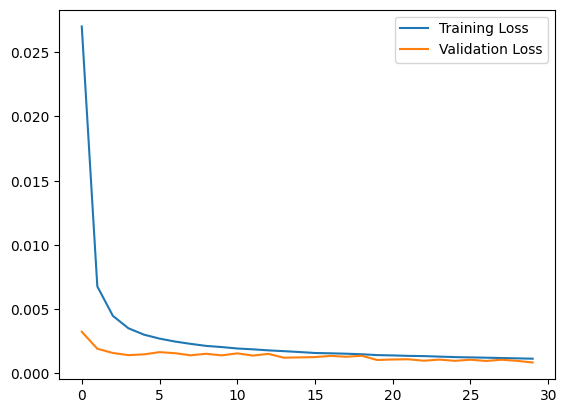

In [25]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

In [26]:
loss=model.evaluate(trainX, trainY)


3561/3561 [==============================] - 17s 5ms/step - loss: 0.0012 - mse: 0.0012


In [27]:
print(loss)

[0.001182624022476375, 0.001182624022476375]


In [28]:
previousData=df[df['Year']<2018].tail(15).copy()
previousData

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
96417,2017,12,31,9,286.668855,0.0,4.340000e-19,300.384192,0.000277,-1.937121,0.224124
96418,2017,12,31,10,289.843789,0.0,4.340000e-19,296.365709,0.000194,-1.367046,0.031899
96419,2017,12,31,11,290.805292,0.0,4.340000e-19,295.893842,0.000073,-1.342142,0.486861
96420,2017,12,31,12,289.984731,0.0,4.340000e-19,295.070830,0.000005,-1.300937,0.940144
96421,2017,12,31,13,290.137419,0.0,4.340000e-19,294.671396,0.000004,-1.620614,0.940983
96422,2017,12,31,14,289.833646,0.0,4.340000e-19,292.583423,0.000006,-2.046246,0.787371
96423,2017,12,31,15,288.762699,0.0,4.340000e-19,290.323814,0.000005,-2.214235,0.549397
96424,2017,12,31,16,288.613749,0.0,4.340000e-19,290.284972,0.000004,-2.277627,0.145639
96425,2017,12,31,17,288.262462,0.0,4.340000e-19,289.425219,0.000003,-2.311587,0.141023
96426,2017,12,31,18,288.242174,0.0,4.340000e-19,289.563262,0.000003,-2.618132,0.303449


In [29]:

testData = pd.concat([previousData, testData], ignore_index=True)
testData.head()

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
0,2017,12,31,9,286.668855,0.0,4.340000e-19,300.384192,0.000277,-1.937121,0.224124
1,2017,12,31,10,289.843789,0.0,4.340000e-19,296.365709,0.000194,-1.367046,0.031899
2,2017,12,31,11,290.805292,0.0,4.340000e-19,295.893842,0.000073,-1.342142,0.486861
3,2017,12,31,12,289.984731,0.0,4.340000e-19,295.070830,0.000005,-1.300937,0.940144
4,2017,12,31,13,290.137419,0.0,4.340000e-19,294.671396,0.000004,-1.620614,0.940983


In [30]:
TestX=[]
TestY=[]
testData.describe()

,Year,Month,Day,Time,2-dewTemp(k),Precipitation(m),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,10-v-wind(m/sec),10-u-wind(m/sec)
count,26319.000000,26319.000000,26319.000000,26319.000000,26319.000000,26319.000000,2.631900e+04,26319.000000,26319.000000,26319.000000,26319.000000
mean,2020.996808,6.525020,15.741366,11.502565,295.375964,0.000188,1.588280e-05,299.641823,0.000140,0.727542,-0.002429
std,0.822025,3.450547,8.806570,6.921947,5.166619,0.000705,1.063040e-04,5.174050,0.000170,2.305718,1.473524
min,2017.000000,1.000000,1.000000,0.000000,278.772515,0.000000,0.000000e+00,283.492930,-0.000020,-6.581986,-12.075359
25%,2020.000000,4.000000,8.000000,6.000000,290.963275,0.000000,0.000000e+00,296.497475,0.000015,-1.418628,-0.768450
50%,2021.000000,7.000000,16.000000,12.000000,297.899311,0.000000,8.670000e-19,300.963502,0.000039,0.930763,0.150751
75%,2022.000000,10.000000,23.000000,18.000000,299.688058,0.000044,1.100000e-07,303.095057,0.000250,2.519374,0.930064
max,2022.000000,12.000000,31.000000,23.000000,302.261006,0.014595,4.382664e-03,312.681496,0.000759,7.851920,8.267616


In [31]:
scaler=scaler.fit(testData)
df_for_testing_scaled=scaler.transform(testData)
df_for_testing_scaled

array([[0.        , 1.        , 1.        , ..., 0.3809169 , 0.32180238,
        0.60460595],
       [0.        , 1.        , 1.        , ..., 0.27484255, 0.36129795,
        0.59515671],
       [0.        , 1.        , 1.        , ..., 0.11871693, 0.36302334,
        0.61752129],
       ...,
       [1.        , 1.        , 1.        , ..., 0.03012892, 0.42689075,
        0.51662663],
       [1.        , 1.        , 1.        , ..., 0.03149082, 0.43515198,
        0.51875322],
       [1.        , 1.        , 1.        , ..., 0.02857429, 0.42332924,
        0.51413095]])

In [32]:
n_future=1
n_past=15

In [33]:
for i in range(n_past, len(df_for_testing_scaled)-n_future+1):
    TestX.append(df_for_testing_scaled[i-n_past:i,0:testData.shape[1]])
    TestY.append(df_for_testing_scaled[i+n_future-1:i+n_future,7])

TestX, TestY=np.array(TestX), np.array(TestY)
print('TestX shape=={}.'.format(TestX.shape))
print('TestY shape=={}.'.format(TestY.shape))
  

TestX shape==(26304, 15, 11).
TestY shape==(26304, 1).


In [34]:
TestX

array([[[0.        , 1.        , 1.        , ..., 0.3809169 ,
         0.32180238, 0.60460595],
        [0.        , 1.        , 1.        , ..., 0.27484255,
         0.36129795, 0.59515671],
        [0.        , 1.        , 1.        , ..., 0.11871693,
         0.36302334, 0.61752129],
        ...,
        [0.        , 1.        , 1.        , ..., 0.02949936,
         0.32308857, 0.58793568],
        [0.        , 1.        , 1.        , ..., 0.02930664,
         0.32142593, 0.59503292],
        [0.        , 1.        , 1.        , ..., 0.02848435,
         0.3289235 , 0.60390448]],

       [[0.        , 1.        , 1.        , ..., 0.27484255,
         0.36129795, 0.59515671],
        [0.        , 1.        , 1.        , ..., 0.11871693,
         0.36302334, 0.61752129],
        [0.        , 1.        , 1.        , ..., 0.0319662 ,
         0.36587806, 0.63980334],
        ...,
        [0.        , 1.        , 1.        , ..., 0.02930664,
         0.32142593, 0.59503292],
        [0. 

In [35]:
TestY

array([[0.0768199 ],
       [0.06615425],
       [0.17746791],
       ...,
       [0.25332106],
       [0.22960403],
       [0.2272237 ]])

In [36]:
pred=model.predict(TestX)

822/822 [==============================] - 5s 4ms/step


In [37]:
pred[0]

array([0.14152807], dtype=float32)

In [38]:
TestY[0]

array([0.0768199])

In [39]:
pred

array([[0.14152807],
       [0.10636737],
       [0.11853382],
       ...,
       [0.2540234 ],
       [0.25759736],
       [0.2542368 ]], dtype=float32)

In [40]:
TestY

array([[0.0768199 ],
       [0.06615425],
       [0.17746791],
       ...,
       [0.25332106],
       [0.22960403],
       [0.2272237 ]])

In [41]:
max_element=testData['Temperature(k)'].max()
min_element=testData['Temperature(k)'].min()
max_element
min_element

283.4929297

In [42]:
pred=max_element-pred*(max_element-min_element)

In [43]:
pred=pred-273

In [44]:

pred

array([[35.550476],
       [36.576782],
       [36.22165 ],
       ...,
       [32.266907],
       [32.162598],
       [32.26068 ]], dtype=float32)

In [45]:
TestY=max_element-TestY*(max_element-min_element)

In [46]:
TestY=TestY-273;



In [47]:
TestY

array([[37.4392333],
       [37.7505486],
       [34.5014623],
       ...,
       [32.2874177],
       [32.9796838],
       [33.0491621]])

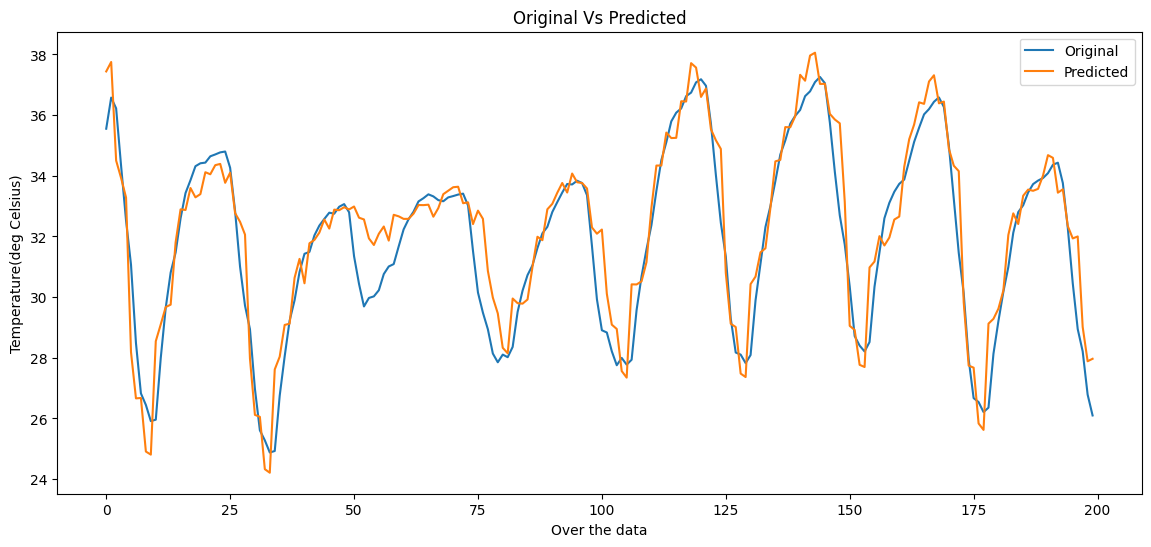

In [48]:
plt.figure(figsize=(14,6))
plt.title('Original Vs Predicted')
plt.xlabel('Over the data')
plt.ylabel('Temperature(deg Celsius)')
plt.plot(pred[:200])
plt.plot(TestY[:200])
plt.legend(['Original','Predicted'])
plt.show()

In [49]:
pred1=pred.T
pred

array([[35.550476],
       [36.576782],
       [36.22165 ],
       ...,
       [32.266907],
       [32.162598],
       [32.26068 ]], dtype=float32)

In [50]:
TestY1=TestY.T


In [51]:
errors = abs(TestY1-pred1)

err_per = 100 * (errors/TestY1)
err_per
accuracy = 100 - np.mean(err_per)
print("Accuracy: ", round(accuracy, 2), "%")
from math import sqrt
rmse = sqrt(mean_squared_error(TestY1, pred1))
print('Test RMSE: %.3f' % rmse) 


Accuracy:  96.73 %
Test RMSE: 0.954


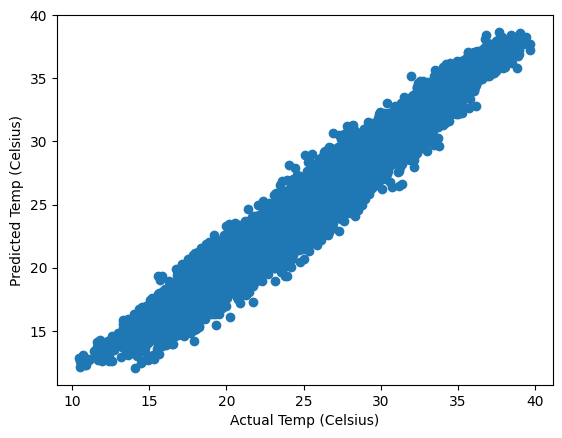

In [52]:
plt.scatter(TestY, pred)
plt.xlabel('Actual Temp (Celsius)')
plt.ylabel('Predicted Temp (Celsius)')
plt.show()

In [53]:
df = pd.DataFrame({'Actual': TestY.flatten(), 'Predicted': pred.flatten()})
df

,Actual,Predicted
0,37.439233,35.550476
1,37.750549,36.576782
2,34.501462,36.221649
3,33.926836,34.326538
4,33.282817,32.523315
...,...,...
26299,31.985841,32.278168
26300,32.538144,32.190491
26301,32.287418,32.266907
26302,32.979684,32.162598
